## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [ ]:
#write your solution here
import pandas as pd
import matplotlib.pyplot as plt

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [ ]:
#Read the data into a dataframe
#Inser your code


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
###
df=pd.read_csv('/content/goodreads.csv')



Lets read the csv file with custom column descriptions specified in the problem statement.

In [ ]:
#Read the data into a dataframe specifying column names


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df = pd.read_csv("goodreads.csv", names = ['rating','revview_count','isbn','booktype','author_url','year','genre_urls','dir','rating_count','name'])
df.head()


rating revview_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [ ]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes

rating           float64
revview_count     object
isbn              object
booktype          object
author_url        object
year             float64
genre_urls        object
dir               object
rating_count      object
name              object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [ ]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.


**Question:** Was the data read correctly and values represented as we expected?

Answer : 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [ ]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.rating.isna().sum()

2

In [ ]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna()]

rating revview_count  isbn booktype author_url  year genre_urls  \
3643     NaN          None  None     None       None   NaN        NaN   
5282     NaN          None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [ ]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['rating','year'],inplace=True)
df.shape


(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [ ]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes
#df.isna().sum()

rating           float64
revview_count     object
isbn              object
booktype          object
author_url        object
year             float64
genre_urls        object
dir               object
rating_count      object
name              object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [ ]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df['rating_count']=df['rating_count'].astype('int')
df['revview_count']=df['revview_count'].astype('int')
df['year']=df['year'].astype('int')
df.dtypes


rating           float64
revview_count      int64
isbn              object
booktype          object
author_url        object
year               int64
genre_urls        object
dir               object
rating_count       int64
name              object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [ ]:
#Insert Your code here


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [ ]:
#Get the first author_url
author = df['author_url'][0]
author

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [ ]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
name = author.split(".")[-1]
name

'Suzanne_Collins'

In [ ]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
    name = url.split(".")[-1]
    return name
    

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()


rating  revview_count        isbn         booktype  \
0    4.40         136455  0439023483  good_reads:book   
1    4.41          16648  0439358078  good_reads:book   
2    3.56          85746  0316015849  good_reads:book   
3    4.23          47906  0061120081  good_reads:book   
4    4.23          34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [ ]:
#Get first genre_url
df = df.dropna(subset=['genre_urls'])
df


rating  revview_count        isbn         booktype  \
0       4.40         136455  0439023483  good_reads:book   
1       4.41          16648  0439358078  good_reads:book   
2       3.56          85746  0316015849  good_reads:book   
3       4.23          47906  0061120081  good_reads:book   
4       4.23          34772  0679783261  good_reads:book   
...      ...            ...         ...              ...   
5995    4.17           2226  0767913736  good_reads:book   
5996    3.99            775  1416909427  good_reads:book   
5997    3.78            540  1620612321  good_reads:book   
5998    3.91            281         NaN  good_reads:book   
5999    4.35             61  0786929081  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
1     https://www.goodreads.com/author/show/1077326....  2003   
2     https://www.goodreads.com/author/show/941441.S...  2005   
3     https://www.goodreads.com/author/show/1825.Har...  1960   
4     https://www.goodreads.com/author/show/1265.Jan...  1813   
...                                                 ...   ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005   
5996  https://www.goodreads.com/author/show/151371.J...  2006   
5997  https://www.goodreads.com/author/show/5761314....  2012   
5998  https://www.goodreads.com/author/show/1201952....  2006   
5999  https://www.goodreads.com/author/show/1023510....  2001   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
3     /genres/classics|/genres/fiction|/genres/histo...   
4     /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir  rating_count  \
0                   dir01/2767052-the-hunger-games.html       2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                             dir01/41865.Twilight.html       2579564   
3                 dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                   dir01/1885.Pride_and_Prejudice.html       1388992   
...                                                 ...           ...   
5995                dir60/78508.The_River_of_Doubt.html         16618   
5996                             dir60/259068.Shug.html          6179   
5997                         dir60/13503247-flawed.html          2971   
5998                                 dir60/2750008.html          3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...          3982   

                                                   name           author  
0               The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1     Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                               Twilight (Twilight, #1)  Stephenie_Meyer  
3                                 To Kill a Mockingbird       Harper_Lee  
4                                   Pride and Prejudice      Jane_Austen  
...                                                 ...              ...  
5995                                 The River of Doubt  Candice_Millard  
5996                                               Shug        Jenny_Han  
5997                                             Flawed     Kate_Avelynn  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  
5999  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  

[5934 rows x 11 c

In [ ]:
first_genre = df['genre_urls'][0]
first_genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [ ]:
genres = first_genre.split("/genres/")[1:]

In [ ]:
# List comphrehension
genres = [genre.replace("|","")for genre in genres]
genres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [ ]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
genres = "".join(genres)
genres


'young-adultscience-fictiondystopiafantasyscience-fictionromanceadventurebook-clubyoung-adultteenapocalypticpost-apocalypticaction'

In [ ]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_genre(url):
    genres = url.split("/genres/")[1:]
    genres = "".join(genres)
    return genres
    
new_df['genres'] = new_df.genre_urls.map(get_genre)
new_df.head()

rating  revview_count        isbn         booktype  \
0    4.40         136455  0439023483  good_reads:book   
1    4.41          16648  0439358078  good_reads:book   
2    3.56          85746  0316015849  good_reads:book   
3    4.23          47906  0061120081  good_reads:book   
4    4.23          34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name  ... fiction    fae  \
0            The Hunger Games (The Hunger Games, #1)  ...   False  False   
1  Harry Potter and the Order of the Phoenix (Har...  ...    True  False   
2                            Twilight (Twilight, #1)  ...    True  False   
3                              To Kill a Mockingbird  ...    True  False   
4                                Pride and Prejudice  ...    True  False   

   southern  espionage  christian-historical-fiction  jewish  young-adult  \
0     False      False                         False   False         True   
1     False      False                         False   False         True   
2     False      False                         False   False         True   
3     False      False                         False   False         True   
4     False      False                         False   False        False   

    kids  humanities  erotica  
0  False       False    False  
1  False       False    False  
2  False       False    False  
3  False       False    False  
4  False       False    False  

[5 rows x 549 columns]

In [ ]:
#use python set to get unique element

genre_set = set()
for genre in new_df.genres:
  genre_set.update(genre.split("|"))

len(genre_set)
  

537

In [ ]:
for genre in genre_set:
  new_df[genre] = [genre in row.split("|") for row in new_df.genres]

new_df.head()
  
  


rating  revview_count        isbn         booktype  \
0    4.40         136455  0439023483  good_reads:book   
1    4.41          16648  0439358078  good_reads:book   
2    3.56          85746  0316015849  good_reads:book   
3    4.23          47906  0061120081  good_reads:book   
4    4.23          34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name  ... fiction    fae  \
0            The Hunger Games (The Hunger Games, #1)  ...   False  False   
1  Harry Potter and the Order of the Phoenix (Har...  ...    True  False   
2                            Twilight (Twilight, #1)  ...    True  False   
3                              To Kill a Mockingbird  ...    True  False   
4                                Pride and Prejudice  ...    True  False   

   southern  espionage  christian-historical-fiction  jewish  young-adult  \
0     False      False                         False   False         True   
1     False      False                         False   False         True   
2     False      False                         False   False         True   
3     False      False                         False   False         True   
4     False      False                         False   False        False   

    kids  humanities  erotica  
0  False       False    False  
1  False       False    False  
2  False       False    False  
3  False       False    False  
4  False       False    False  

[5 rows x 549 columns]

In [ ]:
#converting set into string
genredf = new_df[list(genre_set)]
genredf.head()

african-literature  unicorns  american  mysticism  star-wars  taoism  \
0               False     False     False      False      False   False   
1               False     False     False      False      False   False   
2               False     False     False      False      False   False   
3               False     False     False      False      False   False   
4               False     False     False      False      False   False   

   european-history  religion  activism  low-fantasy  ...  fiction    fae  \
0             False     False     False        False  ...    False  False   
1             False     False     False        False  ...     True  False   
2             False     False     False        False  ...     True  False   
3             False     False     False        False  ...     True  False   
4             False     False     False        False  ...     True  False   

   southern  espionage  christian-historical-fiction  jewish  young-adult  \
0     False      False                         False   False         True   
1     False      False                         False   False         True   
2     False      False                         False   False         True   
3     False      False                         False   False         True   
4     False      False                         False   False        False   

    kids  humanities  erotica  
0  False       False    False  
1  False       False    False  
2  False       False    False  
3  False       False    False  
4  False       False    False  

[5 rows x 537 columns]

In [ ]:
# to see how many fiction are there
result=genredf.sum()
result = result.sort_values(ascending=False)
x = sorted(genre_set)[:20]
y = result[:20]

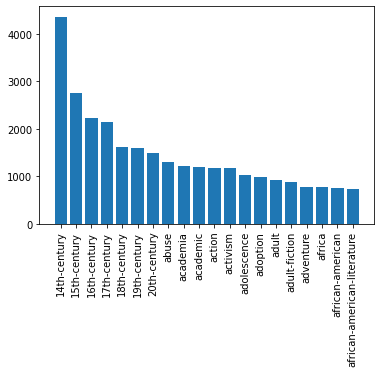

In [ ]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

---


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000.
Which are the highly rated books from the year 2000?

In [ ]:
#Deterime best book each year based on rating. 
best_book = df[df['year']>2000]
best_book.groupby(['year']).max()
#best_book = pd.DataFrame()
#for year, value in df.groupby('year',sort=True):
 #   highrated = value[value.revview_count == value.revview_count.max()]
#    if best_book.empty == True:
    #    best_book = highrated
  #  else:
   #     best_book = pd.concat([best_book,highrated])

#print(best_book.shape)
#best_book.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  This is separate from the ipykernel package so we can avoid doing imports until


rating  revview_count         booktype  \
year                                           
2001    4.50          36670  good_reads:book   
2002    4.62          46332  good_reads:book   
2003    4.66          38061  good_reads:book   
2004    4.58          26761  good_reads:book   
2005    4.80          85746  good_reads:book   
2006    4.67          50663  good_reads:book   
2007    4.76          38199  good_reads:book   
2008    4.75         136455  good_reads:book   
2009    4.69          79046  good_reads:book   
2010    4.72          83643  good_reads:book   
2011    4.66          82098  good_reads:book   
2012    4.80         112279  good_reads:book   
2013    4.93          47308  good_reads:book   
2014    5.00          11011  good_reads:book   

                                             author_url  \
year                                                      
2001  https://www.goodreads.com/author/show/9993.Mar...   
2002  https://www.goodreads.com/author/show/9972.Jul...   
2003  https://www.goodreads.com/author/show/9987.Phi...   
2004  https://www.goodreads.com/author/show/9678.Ann...   
2005  https://www.goodreads.com/author/show/9987.Phi...   
2006  https://www.goodreads.com/author/show/9987.Phi...   
2007  https://www.goodreads.com/author/show/978484.L...   
2008  https://www.goodreads.com/author/show/9987.Phi...   
2009  https://www.goodreads.com/author/show/99650.We...   
2010  https://www.goodreads.com/author/show/99650.We...   
2011  https://www.goodreads.com/author/show/99650.We...   
2012  https://www.goodreads.com/author/show/98389.Ri...   
2013  https://www.goodreads.com/author/show/88506.Jo...   
2014  https://www.goodreads.com/author/show/8472193....   

                                             genre_urls  \
year                                                      
2001  /genres/young-adult|/genres/womens-fiction|/ge...   
2002  /genres/young-adult|/genres/womens-fiction|/ge...   
2003  /genres/young-adult|/genres/womens-fiction|/ge...   
2004  /genres/young-adult|/genres/womens-fiction|/ge...   
2005  /genres/young-adult|/genres/womens-fiction|/ge...   
2006  /genres/young-adult|/genres/womens-fiction|/ge...   
2007  /genres/young-adult|/genres/womens-fiction|/ge...   
2008  /genres/young-adult|/genres/womens-fiction|/ge...   
2009  /genres/young-adult|/genres/womens-fiction|/ge...   
2010  /genres/young-adult|/genres/womens-fiction|/ge...   
2011  /genres/young-adult|/genres/shapeshifters|/gen...   
2012  /genres/young-adult|/genres/shapeshifters|/gen...   
2013  /genres/young-adult|/genres/teen|/genres/adven...   
2014  /genres/young-adult|/genres/science-fiction|/g...   

                                                    dir  rating_count  \
year                                                                    
2001  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...        794732   
2002                 dir60/65686.Nightmare_Academy.html       1268863   
2003              dir60/231.I_am_Charlotte_Simmons.html       1284478   
2004                            dir60/47667.Seeing.html        646158   
2005                dir60/78508.The_River_of_Doubt.html       2579564   
2006                dir60/30189.Cast_In_Courtlight.html        885435   
2007                           dir60/702051.Gideon.html       1245866   
2008                         dir60/2177563.Madness.html       2958974   
2009                                 dir60/6976667.html       1443600   
2010                  dir60/7831742-the-lost-saint.html       1316704   
2011                       dir60/9758765-wildefire.html       1127983   
2012                  dir60/8419647-never-eighteen.html       1150626   
2013             dir60/17899696-the-edge-of-always.html        358301   
2014                  dir60/20504754-transcendence.html         69924   

                                                  name          author  
year                                                                    
2001                            

In [ ]:
best_book.sort_values(by=[best_book.columns[4]],ascending=False)[:5]

rating  revview_count        isbn         booktype  \
5745    3.82           3034  0385722435  good_reads:book   
2254    3.78           2468  0743246071  good_reads:book   
5578    3.53           2077  1416549129  good_reads:book   
173     4.02          14169  0743227441  good_reads:book   
4098    3.80           3442  0743272501  good_reads:book   

                                             author_url  year  \
5745  https://www.goodreads.com/author/show/9993.Mar...  2001   
2254  https://www.goodreads.com/author/show/9987.Phi...  2003   
5578  https://www.goodreads.com/author/show/9987.Phi...  2008   
173   https://www.goodreads.com/author/show/9987.Phi...  2001   
4098  https://www.goodreads.com/author/show/9987.Phi...  2006   

                                             genre_urls  \
5745  /genres/fiction|/genres/book-club|/genres/humo...   
2254  /genres/historical-fiction|/genres/fiction|/ge...   
5578  /genres/historical-fiction|/genres/fiction|/ge...   
173   /genres/historical-fiction|/genres/fiction|/ge...   
4098  /genres/fiction|/genres/historical-fiction|/ge...   

                                          dir  rating_count  \
5745         dir58/16200.Ella_Minnow_Pea.html         15135   
2254       dir23/252499.The_Queen_s_Fool.html         55234   
5578       dir56/2241558.The_Other_Queen.html         25483   
173    dir02/37470.The_Other_Boleyn_Girl.html        318994   
4098  dir41/16180.The_Boleyn_Inheritance.html         55210   

                                              name            author  
5745                               Ella Minnow Pea         Mark_Dunn  
2254        The Queen's Fool (The Tudor Court, #4)  Philippa_Gregory  
5578         The Other Queen (The Tudor Court, #6)  Philippa_Gregory  
173    The Other Boleyn Girl (The Tudor Court, #2)  Philippa_Gregory  
4098  The Boleyn Inheritance (The Tudor Court, #3)  Philippa_Gregory

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [ ]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
#######
best_book[df.year == '2000']
best_book.shape 
best_book




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


rating  revview_count        isbn         booktype  \
0       4.40         136455  0439023483  good_reads:book   
1       4.41          16648  0439358078  good_reads:book   
2       3.56          85746  0316015849  good_reads:book   
11      3.72          34959  0307277674  good_reads:book   
12      4.36          69524  0375831002  good_reads:book   
...      ...            ...         ...              ...   
5995    4.17           2226  0767913736  good_reads:book   
5996    3.99            775  1416909427  good_reads:book   
5997    3.78            540  1620612321  good_reads:book   
5998    3.91            281         NaN  good_reads:book   
5999    4.35             61  0786929081  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
1     https://www.goodreads.com/author/show/1077326....  2003   
2     https://www.goodreads.com/author/show/941441.S...  2005   
11    https://www.goodreads.com/author/show/630.Dan_...  2003   
12    https://www.goodreads.com/author/show/11466.Ma...  2005   
...                                                 ...   ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005   
5996  https://www.goodreads.com/author/show/151371.J...  2006   
5997  https://www.goodreads.com/author/show/5761314....  2012   
5998  https://www.goodreads.com/author/show/1201952....  2006   
5999  https://www.goodreads.com/author/show/1023510....  2001   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
11    /genres/mystery|/genres/thriller|/genres/suspe...   
12    /genres/historical-fiction|/genres/young-adult...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir  rating_count  \
0                   dir01/2767052-the-hunger-games.html       2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                             dir01/41865.Twilight.html       2579564   
11                     dir01/968.The_Da_Vinci_Code.html       1220657   
12                      dir01/19063.The_Book_Thief.html        675431   
...                                                 ...           ...   
5995                dir60/78508.The_River_of_Doubt.html         16618   
5996                             dir60/259068.Shug.html          6179   
5997                         dir60/13503247-flawed.html          2971   
5998                                 dir60/2750008.html          3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...          3982   

                                                   name           author  
0               The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1     Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                               Twilight (Twilight, #1)  Stephenie_Meyer  
11               The Da Vinci Code (Robert Langdon, #2)        Dan_Brown  
12                                       The Book Thief     Markus_Zusak  
...                                                 ...              ...  
5995                                 The River of Doubt  Candice_Millard  
5996                                               Shug        Jenny_Han  
5997                                             Flawed     Kate_Avelynn  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  
5999  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  

[3120 rows x 11 c

In [ ]:
best_book.sort_values(by=['rating'],ascending=False)[:10]

rating  revview_count        isbn         booktype  \
1718    5.00             28         NaN  good_reads:book   
5564    5.00              9         NaN  good_reads:book   
3712    4.93              7  1781843457  good_reads:book   
3254    4.92              5         NaN  good_reads:book   
1951    4.85            104         NaN  good_reads:book   
911     4.85             26  1491732954  good_reads:book   
1561    4.84             15         NaN  good_reads:book   
2108    4.83             19         NaN  good_reads:book   
249     4.80            644  0740748475  good_reads:book   
2630    4.80             46  1475124511  good_reads:book   

                                             author_url  year  \
1718  https://www.goodreads.com/author/show/6467808....  2014   
5564  https://www.goodreads.com/author/show/7738947....  2014   
3712  https://www.goodreads.com/author/show/5014793....  2013   
3254  https://www.goodreads.com/author/show/5227478....  2014   
1951  https://www.goodreads.com/author/show/8472193....  2014   
911   https://www.goodreads.com/author/show/8189303....  2014   
1561  https://www.goodreads.com/author/show/7043626....  2013   
2108  https://www.goodreads.com/author/show/7172051....  2014   
249   https://www.goodreads.com/author/show/13778.Bi...  2005   
2630  https://www.goodreads.com/author/show/5461236....  2012   

                                             genre_urls  \
1718                   /genres/poetry|/genres/childrens   
5564                  /genres/romance|/genres/new-adult   
3712  /genres/fantasy|/genres/romance|/genres/suspen...   
3254                                /genres/young-adult   
1951                                    /genres/romance   
911                                     /genres/fiction   
1561  /genres/science-fiction|/genres/short-stories|...   
2108  /genres/suspense|/genres/european-literature|/...   
249   /genres/sequential-art|/genres/comics|/genres/...   
2630                /genres/non-fiction|/genres/animals   

                                                    dir  rating_count  \
1718     dir18/22204746-an-elephant-is-on-my-house.html            64   
5564                      dir56/21902777-untainted.html            14   
3712                    dir38/18080358-blade-heart.html            15   
3254                       dir33/13495579-blackout.html            25   
1951           dir20/23258641-van-laven-chronicles.html           201   
911              dir10/22242097-honor-and-polygamy.html            97   
1561                      dir16/18713658-nglnd-xpx.html           105   
2108        dir22/20880952-a-house-without-windows.html            71   
249     dir03/24812.The_Complete_Calvin_and_Hobbes.html         22674   
2630  dir27/16186085-if-i-should-die-before-my-dog--...            81   

                                      name                      author  
1718            An Elephant Is On My House  Othen_Donald_Dale_Cummings  
5564  Untainted (Photographer Trilogy, #3)              Sarah_Robinson  
3712                           Blade Heart                 Chris_Lange  
3254          Blackout (Talisman of El #2)                Alecia_Stone  
1951                  Van Laven Chronicles                 Tyler_Chase  
911                     Honor and Polygamy                 Omar_Farhad  
1561                             NGLND XPX                  Ian_Hutson  
2108               A House Without Windows               Stevie_Turner  
249         The Complete Calvin and Hobbes              Bill_Watterson  
2630      If I Should Die Before My Dog --                Joe_Connolly

In [ ]:
new_df = df.dropna(subset=['genre_urls'])
new_df

rating  revview_count        isbn         booktype  \
0       4.40         136455  0439023483  good_reads:book   
1       4.41          16648  0439358078  good_reads:book   
2       3.56          85746  0316015849  good_reads:book   
3       4.23          47906  0061120081  good_reads:book   
4       4.23          34772  0679783261  good_reads:book   
...      ...            ...         ...              ...   
5995    4.17           2226  0767913736  good_reads:book   
5996    3.99            775  1416909427  good_reads:book   
5997    3.78            540  1620612321  good_reads:book   
5998    3.91            281         NaN  good_reads:book   
5999    4.35             61  0786929081  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
1     https://www.goodreads.com/author/show/1077326....  2003   
2     https://www.goodreads.com/author/show/941441.S...  2005   
3     https://www.goodreads.com/author/show/1825.Har...  1960   
4     https://www.goodreads.com/author/show/1265.Jan...  1813   
...                                                 ...   ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005   
5996  https://www.goodreads.com/author/show/151371.J...  2006   
5997  https://www.goodreads.com/author/show/5761314....  2012   
5998  https://www.goodreads.com/author/show/1201952....  2006   
5999  https://www.goodreads.com/author/show/1023510....  2001   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
3     /genres/classics|/genres/fiction|/genres/histo...   
4     /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir  rating_count  \
0                   dir01/2767052-the-hunger-games.html       2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                             dir01/41865.Twilight.html       2579564   
3                 dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                   dir01/1885.Pride_and_Prejudice.html       1388992   
...                                                 ...           ...   
5995                dir60/78508.The_River_of_Doubt.html         16618   
5996                             dir60/259068.Shug.html          6179   
5997                         dir60/13503247-flawed.html          2971   
5998                                 dir60/2750008.html          3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...          3982   

                                                   name           author  
0               The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1     Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                               Twilight (Twilight, #1)  Stephenie_Meyer  
3                                 To Kill a Mockingbird       Harper_Lee  
4                                   Pride and Prejudice      Jane_Austen  
...                                                 ...              ...  
5995                                 The River of Doubt  Candice_Millard  
5996                                               Shug        Jenny_Han  
5997                                             Flawed     Kate_Avelynn  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  
5999  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  

[5934 rows x 11 c

In [ ]:
#plot the data here
import numpy as np
df.groupby('year').agg([np.sum,np.max])['rating']



sum  amax
year                
-1500     3.60  3.60
-800      7.69  4.01
-560      4.03  4.03
-512      3.92  3.92
-500      4.06  4.06
...        ...   ...
 2010  1260.17  4.72
 2011  1498.68  4.66
 2012  1400.25  4.80
 2013  1092.89  4.93
 2014   320.12  5.00

[292 rows x 2 columns]

In [ ]:
df.groupby('rating')


In [ ]:
gkk = df.groupby(['rating', 'isbn'])
gkk.first()

revview_count         booktype  \
rating isbn                                         
2.00   0983650322            368  good_reads:book   
2.77   0060988649            800  good_reads:book   
2.97   0395083621           1399  good_reads:book   
3.01   0452286530           3072  good_reads:book   
3.03   1416523723            485  good_reads:book   
...                          ...              ...   
4.80   0740748475            644  good_reads:book   
       1469908530              8  good_reads:book   
       1475124511             46  good_reads:book   
4.85   1491732954             26  good_reads:book   
4.93   1781843457              7  good_reads:book   

                                                          author_url  year  \
rating isbn                                                                  
2.00   0983650322  https://www.goodreads.com/author/show/9414.Vic...  2011   
2.77   0060988649  https://www.goodreads.com/author/show/7025.Gre...  2001   
2.97   0395083621  https://www.goodreads.com/author/show/30691.Ad...  1925   
3.01   0452286530  https://www.goodreads.com/author/show/1448.Kar...  2004   
3.03   1416523723  https://www.goodreads.com/author/show/1624.Her...  1924   
...                                                              ...   ...   
4.80   0740748475  https://www.goodreads.com/author/show/13778.Bi...  2005   
       1469908530  https://www.goodreads.com/author/show/4695431....  2012   
       1475124511  https://www.goodreads.com/author/show/5461236....  2012   
4.85   1491732954  https://www.goodreads.com/author/show/8189303....  2014   
4.93   1781843457  https://www.goodreads.com/author/show/5014793....  2013   

                                                          genre_urls  \
rating isbn                                                            
2.00   0983650322  /genres/young-adult|/genres/science-fiction|/g...   
2.77   0060988649  /genres/fantasy|/genres/fiction|/genres/myster...   
2.97   0395083621  /genres/history|/genres/non-fiction|/genres/bi...   
3.01   0452286530  /genres/fiction|/genres/womens-fiction|/genres...   
3.03   1416523723  /genres/classics|/genres/fiction|/genres/liter...   
...                                                              ...   
4.80   0740748475  /genres/sequential-art|/genres/comics|/genres/...   
       1469908530                                    /genres/fantasy   
       1475124511                /genres/non-fiction|/genres/animals   
4.85   1491732954                                    /genres/fiction   
4.93   1781843457  /genres/fantasy|/genres/romance|/genres/suspen...   

                                                                 dir  \
rating isbn                                                            
2.00   0983650322                 dir38/12393909-revealing-eden.html   
2.77   0060988649                              dir60/24929.Lost.html   
2.97   0395083621                        dir59/54270.Mein_Kampf.html   
3.01   0452286530          dir52/2152.The_Jane_Austen_Book_Club.html   
3.03   1416523723                 dir51/15613.Billy_Budd_Sailor.html   
...                                                              ...   
4.80   0740748475    dir03/24812.The_Complete_Calvin_and_Hobbes.html   
       1469908530  dir57/15734769-myrtle-mae-and-the-mirror-in-th...   
       1475124511  dir27/16186085-if-i-should-die-before-my-dog--...   
4.85   1491732954             dir10/22242097-honor-and-polygamy.html   
4.93   1781843457                    dir38/18080358-blade-heart.html   

                   rating_count  \
rating isbn                       
2.00   0983650322           688   
2.77   0060988649         11128   
2.97   0395083621         12417   
3.01   0452286530         44813   
3.03   1416523723          8978   
...                         ...   
4.80   0740748475         22674   
       1469908530            10   
       1475124511            81   
4.85   1491732954            97   
4.93   1781843457   

In [ ]:
gkk.groups

{(2.0, '0983650322'): [3738], (2.77, '0060988649'): [5979], (2.9, nan): [2609], (2.97, '0395083621'): [5844], (3.01, '0452286530'): [5113], (3.03, '1416523723'): [5064], (3.05, '0143036696'): [2957], (3.08, '1400069262'): [5133], (3.09, '0307476103'): [4280], (3.12, '159691288X'): [5066], (3.15, '1580495869'): [931], (3.15, nan): [5817], (3.18, '034550254X'): [4157], (3.19, '0452287316'): [5770], (3.2, '0330412744'): [5195], (3.2, '1573221090'): [5284], (3.21, '0224085611'): [2512], (3.21, '0440421241'): [4870], (3.21, '1841196843'): [4446], (3.22, '0143035479'): [5266], (3.23, '0446363251'): [3090], (3.23, '1565125967'): [2875], (3.24, '0316228532'): [1343], (3.24, nan): [4533], (3.25, '0743249291'): [3502], (3.25, '1594743347'): [2403], (3.28, '0140432159'): [3788], (3.29, '0316113573'): [5807], (3.29, '0452281423'): [5958], (3.3, '0142437808'): [655], (3.31, '0767905202'): [5329], (3.31, '1497465141'): [1968], (3.32, '0060882034'): [5931], (3.32, '0142437263'): [109], (3.32, '081297

In [ ]:
df = pd.DataFrame(gkk)
df

0                                                  1
0      (2.0, 0983650322)        rating  revview_count        isbn       ...
1     (2.77, 0060988649)        rating  revview_count        isbn       ...
2     (2.97, 0395083621)        rating  revview_count        isbn       ...
3     (3.01, 0452286530)        rating  revview_count        isbn       ...
4     (3.03, 1416523723)        rating  revview_count        isbn       ...
...                  ...                                                ...
5491   (4.8, 0740748475)       rating  revview_count        isbn        ...
5492   (4.8, 1469908530)        rating  revview_count        isbn       ...
5493   (4.8, 1475124511)        rating  revview_count        isbn       ...
5494  (4.85, 1491732954)       rating  revview_count        isbn        ...
5495  (4.93, 1781843457)        rating  revview_count        isbn       ...

[5496 rows x 2 columns]

In [ ]:
gkk.sum()

revview_count  year  rating_count
rating isbn                                         
2.00   0983650322            368  2011           688
2.77   0060988649            800  2001         11128
2.97   0395083621           1399  1925         12417
3.01   0452286530           3072  2004         44813
3.03   1416523723            485  1924          8978
...                          ...   ...           ...
4.80   0740748475            644  2005         22674
       1469908530              8  2012            10
       1475124511             46  2012            81
4.85   1491732954             26  2014            97
4.93   1781843457              7  2013            15

[5496 rows x 3 columns]

In [ ]:
gkk.agg(['mean','median','max'])

revview_count                  year                \
                           mean  median   max    mean  median   max   
rating isbn                                                           
2.00   0983650322         368.0   368.0   368  2011.0  2011.0  2011   
2.77   0060988649         800.0   800.0   800  2001.0  2001.0  2001   
2.97   0395083621        1399.0  1399.0  1399  1925.0  1925.0  1925   
3.01   0452286530        3072.0  3072.0  3072  2004.0  2004.0  2004   
3.03   1416523723         485.0   485.0   485  1924.0  1924.0  1924   
...                         ...     ...   ...     ...     ...   ...   
4.80   0740748475         644.0   644.0   644  2005.0  2005.0  2005   
       1469908530           8.0     8.0     8  2012.0  2012.0  2012   
       1475124511          46.0    46.0    46  2012.0  2012.0  2012   
4.85   1491732954          26.0    26.0    26  2014.0  2014.0  2014   
4.93   1781843457           7.0     7.0     7  2013.0  2013.0  2013   

                  rating_count                  
                          mean   median    max  
rating isbn                                     
2.00   0983650322        688.0    688.0    688  
2.77   0060988649      11128.0  11128.0  11128  
2.97   0395083621      12417.0  12417.0  12417  
3.01   0452286530      44813.0  44813.0  44813  
3.03   1416523723       8978.0   8978.0   8978  
...                        ...      ...    ...  
4.80   0740748475      22674.0  22674.0  22674  
       1469908530         10.0     10.0     10  
       1475124511         81.0     81.0     81  
4.85   1491732954         97.0     97.0     97  
4.93   1781843457         15.0     15.0     15  

[5496 rows x 9 columns]